<a href="https://colab.research.google.com/github/philz3phyr/Projects/blob/main/PHILIP_AFRIYIE_ML_ASSESSMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle
from google.colab import files
#upload kaggle.json file
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"philipafriyie","key":"73381d818f4b52908548d76927d50c22"}'}

In [ ]:
import os
#assign the root path of our dataset from kaggle
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [ ]:
#downloading kaggle datasets
!kaggle datasets download -d thomasnibb/image-classification-covid19-xray

 95% 27.0M/28.3M [00:02<00:00, 22.0MB/s]
100% 28.3M/28.3M [00:02<00:00, 12.3MB/s]


In [ ]:
#unzipping datasets to the MLCOVID/Train folder
!mkdir -p MLCOVID/Train
!unzip \image-classification-covid19-xray.zip -d \MLCOVID/Train

In [ ]:
TARGET_VAL_COVID_DIR = "/content/MLCOVID/Val/Covid"
!mkdir -p "$TARGET_VAL_COVID_DIR"

TARGET_VAL_NORMAL_DIR = "/content/MLCOVID/Val/Normal"
!mkdir -p "$TARGET_VAL_NORMAL_DIR"

In [ ]:
#copying images to the Val directory
import shutil
imageSource = "/content/MLCOVID/Train/COVID19/"
imageDest = "/content/MLCOVID/Val/Covid"

for filename in os.listdir(imageSource):
    sourceImage = os.path.join(imageSource, filename)
    destImage = os.path.join(imageDest, filename)
    shutil.copy(sourceImage, destImage)

print("Images copied successfully.")

Images copied successfully.


In [ ]:
#copying images to the Val directory
import shutil
imageSource = "/content/MLCOVID/Train/Normal/"
imageDest = "/content/MLCOVID/Val/Normal"
for filename in os.listdir(imageSource):
    sourceImage = os.path.join(imageSource, filename)
    destImage = os.path.join(imageDest, filename)
    shutil.copy(sourceImage, destImage)

print("Images copied successfully.")

Images copied successfully.


In [ ]:
TRAIN_PATH = "/content/MLCOVID/"
VAL_PATH = "/content/MLCOVID/Val/"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image


In [ ]:
model = Sequential() #creating a sequential model


model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                   

In [ ]:
trainDatagen = image.ImageDataGenerator(
    rescale = 1./255, #rescale the image to bring it within the range [0,1]
    shear_range = 0.2, #tilt the image in a particular direction
    zoom_range = 0.2, #zoom in or out of the image
    horizontal_flip = True, #flips image from left to right to increase diversity
)

testDataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
trainGenerator = trainDatagen.flow_from_directory(
    '/content/MLCOVID/Train/',
    target_size = (224,224), #specify dimension for input image resize
    batch_size = 32, #number of images to train in a particular batch
    class_mode = 'binary' #specifies type of classification problem being worked on (binary classificatio)
)

Found 60 images belonging to 2 classes.


In [ ]:
trainGenerator.class_indices

{'COVID19': 0, 'Normal': 1}

In [ ]:
validationGenerator = testDataset.flow_from_directory(
    '/content/MLCOVID/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [ ]:
mlHistory = model.fit(
    trainGenerator,
    steps_per_epoch = 1, #num of bathces to process from training data before moving next training epoch(in this case, batch size is 32)
    validation_data= validationGenerator, #data generator for validation data
    validation_steps = 2, #number of batched to process from val data during each val epoch
    epochs = 10 #how many times to iterate the entire dataset
)

Epoch 1/10
1/1 [==============================] - 7s 7s/step - loss: 0.3433 - accuracy: 0.8929 - val_loss: 0.2074 - val_accuracy: 0.9333
Epoch 2/10
1/1 [==============================] - 6s 6s/step - loss: 0.3299 - accuracy: 0.7500 - val_loss: 0.2152 - val_accuracy: 0.9333
Epoch 3/10
1/1 [==============================] - 13s 13s/step - loss: 0.4192 - accuracy: 0.8571 - val_loss: 0.3200 - val_accuracy: 0.9000
Epoch 4/10
1/1 [==============================] - 7s 7s/step - loss: 0.1594 - accuracy: 0.9286 - val_loss: 0.2667 - val_accuracy: 0.9167
Epoch 5/10
1/1 [==============================] - 5s 5s/step - loss: 0.2530 - accuracy: 0.8929 - val_loss: 0.3564 - val_accuracy: 0.8500
Epoch 6/10
1/1 [==============================] - 7s 7s/step - loss: 0.2743 - accuracy: 0.8750 - val_loss: 0.3001 - val_accuracy: 0.8667
Epoch 7/10
1/1 [==============================] - 7s 7s/step - loss: 0.2875 - accuracy: 0.9062 - val_loss: 0.2403 - val_accuracy: 0.9333
Epoch 8/10
1/1 [=======================

In [ ]:
model.save("mymlmodel")

In [ ]:
model.evaluate(trainGenerator) #evaluate performance of trained ML model on a given dataset

2/2 [==============================] - 3s 2s/step - loss: 0.2327 - accuracy: 0.9167


[0.23271559178829193, 0.9166666865348816]

In [ ]:
model.evaluate(validationGenerator) #evaluate performance of trained ML model using val dataset

2/2 [==============================] - 4s 1s/step - loss: 0.2097 - accuracy: 0.9333


[0.20969848334789276, 0.9333333373069763]

In [ ]:
model = load_model('mymlmodel') #loading our saved model for evaluation

In [ ]:
import os


In [ ]:
trainGenerator.class_indices

{'COVID19': 0, 'Normal': 1}

In [ ]:
y_actual = [] #array to hold or actual labels
y_test = [] #hold our test labels

In [ ]:
for i in os.listdir("/content/MLCOVID/Val/Normal"):
  img  = image.load_img("/content/MLCOVID/Val/Normal/"+i, target_size=(224,224)) #load image using keras
  img = image.img_to_array(img) #convert image to numpy aray
  img = np.expand_dims(img, axis=0) #expand dimension for batch processing
  #p = model.predict_classes(img)
  p = (model.predict(img) > 0.5).astype("int32") #preict the class of the image

  #collect predicted labels and actual labels for later evaluation
  y_test.append(p[0,0]) #apend  binary prediction p(0,0) to y_test array
  y_actual.append(1) #append the value 1 to y_actual

1/1 [==============================] - 0s 34ms/step


In [ ]:
for i in os.listdir("/content/MLCOVID/Val/Covid/"):
  img  = image.load_img("/content/MLCOVID/Val/Covid/"+i, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  #p = model.predict_classes(img)
  p = (model.predict(img) > 0.5).astype("int32")
  y_test.append(p[0,0])
  y_actual.append(0)

1/1 [==============================] - 0s 19ms/step


In [ ]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_actual, y_test)

In [ ]:
import seaborn as sns

<Axes: >

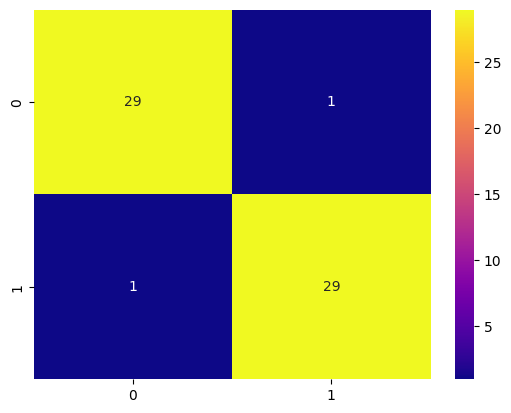

In [ ]:
sns.heatmap(cm, cmap="plasma", annot=True)